# Identifying a Key Change in an Audio File using Time Series Analysis Techniques
### *DATA 330 Final Project*
*Joe Barry* <br>
*May 12th, 2021*

## Introduction

<p>One point of emphasis in the analyses done in our class was the identification of dominant frequencies in data. This can be useful for modelling realizations in order to better understand the underlying patterns for prediction. Identifying frequencies has a different application for musical time series.</p>

<p>The pitch of a note is determined by its frequency. For example, a tone which has a frequency of 440 Hz (cycles per second) is called $A_4$ with standard, twelve tone equal-tempered tuning (MTU). If this frequency is halved to 220 Hz, the note produced is $A_3$, which is one octave lower. The relationship between all notes in the twelve tone system, which is so-called because there are 12 notes between octaves, can be similarly determined. For example, the ratio between $A_4$ and $E_5$ is $2/3$; this is called a perfect fifth, and, like the octave, is a common interval on which musical harmonies are based.</p>

<p>With the aid of time series analyses to determine dominant frequencies, it should be possible to identify some of the common notes in a section of a song. Similarly, in a song where the key changes throughout the piece, these dominant frequencies would change as well.</p>

<p>The song I will analyze in this project is the demo version of “My Sweet Lord”, by George Harrison, recorded in 1970. This song is ideal for analyzing key changes, as it features one about halfway through the song, with both halves having a similar structure. For this reason, each half should feature similar tones, and thus be comparable by frequency. Since the transition raises the key of the song by two semitones, the ratio between dominant frequencies should be approximately 1.1225 (SFU).</p>



## Methodology

### Loading and Preparing the Audio File

First, we need to import the libraries we will use throughout the project.

In [ ]:
install.packages('tuneR', dependencies = TRUE)
install.packages('tswge')

library('tuneR')
library('tswge')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Next we will read the mp3 file for the song, remove the introduction, and lower the sampling rate. The file is stored in the 'tmp' folder. Additionally, since this audio file has two channels, and we can only use one realization for the analysis. For this reason, we will only take the left channel of the audio; I expect the difference between the channels to be negligent.

In [ ]:
full.mp3 <- readMP3('/tmp/MySweetLord.mp3')
mp3 <- full.mp3[129600:length(full.mp3)] # Cut out beginning of the file; no music here
num.samples <- length(mp3@left) # For reduction
indices <- seq(1, (num.samples - 1), 10) # Only every 10 samples
mp3.reduced <- mp3[indices]
s1 <- mp3.reduced@left # We only want one channel of the audio; the left side.
m1 <- s1 / 2^(mp3.reduced@bit - 1) # Maps amplitudes on range from -1 to 1.
num.samples <- length(mp3.reduced@left) # For future use
my.time <- (0:(num.samples - 1)) / mp3.reduced@samp.rate

Next I will divide the song into two sections based on the key change at 1:46.

In [ ]:
msl1 <- ts(m1[1:427770])
msl2 <- ts(m1[427771:(num.samples-1)])

num.samples1 <- length(msl1)
my.time1 <- (0:(num.samples1 - 1)) / mp3.reduced@samp.rate

num.samples2 <- length(msl2)
my.time2 <- (0:(num.samples2 - 1)) / mp3.reduced@samp.rate

In [ ]:
print(num.samples1)
print(num.samples2)

[1] 427770
[1] 499301


Below is a table describing the basic features of our realizations, stored in *msl1* and *msl2*. Note that while the original Hertz range may have been larger, 2,205 Hz is the maximum with our lowered sampling rate. However, notes which are above this frequency ($C_7$, or the second highest C on a piano) are too high to be the primary frequencies in a typical song, so we do not have to worry about this limit.

| Statistic     | First half | Second half |
| ----------- | ----------- | --------- |
| Number of Samples      | 427770       | 499301 |
| Sample Frequency   |   4,410 per second      |4,410 per second  |
| Hertz Range | 0 - 2205 Hz | 0 - 2205 Hz |

### Identifying Dominant Frequencies

First we will plot the realization, autocorrelation, and periodogram for the first section of the song. These steps have been separated out due to high runtime.

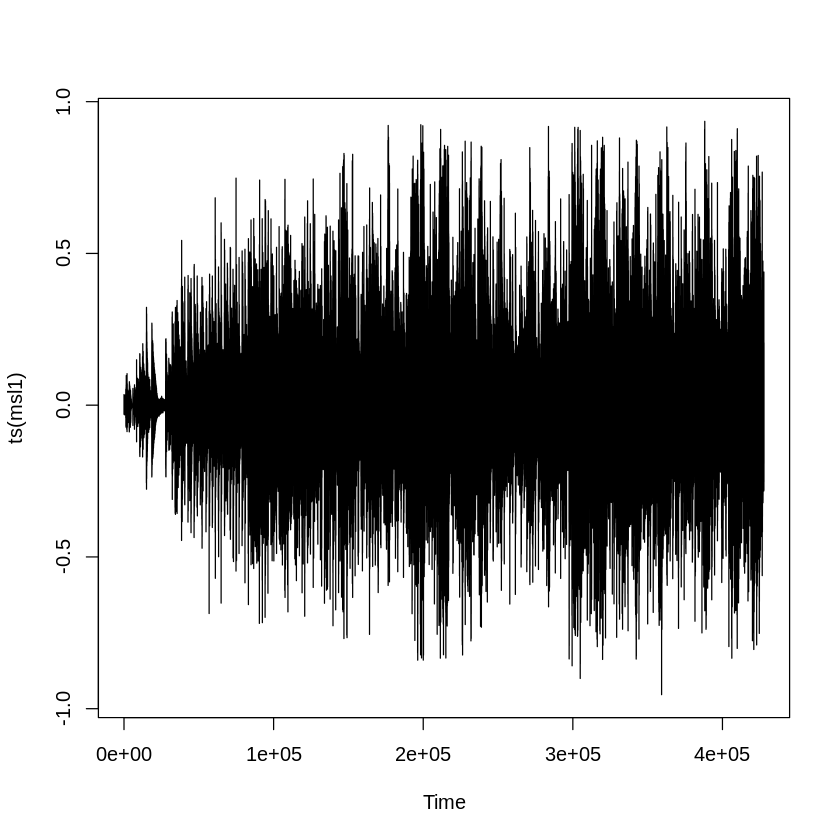

In [ ]:
msl1.plot <- plot.ts(ts(msl1))

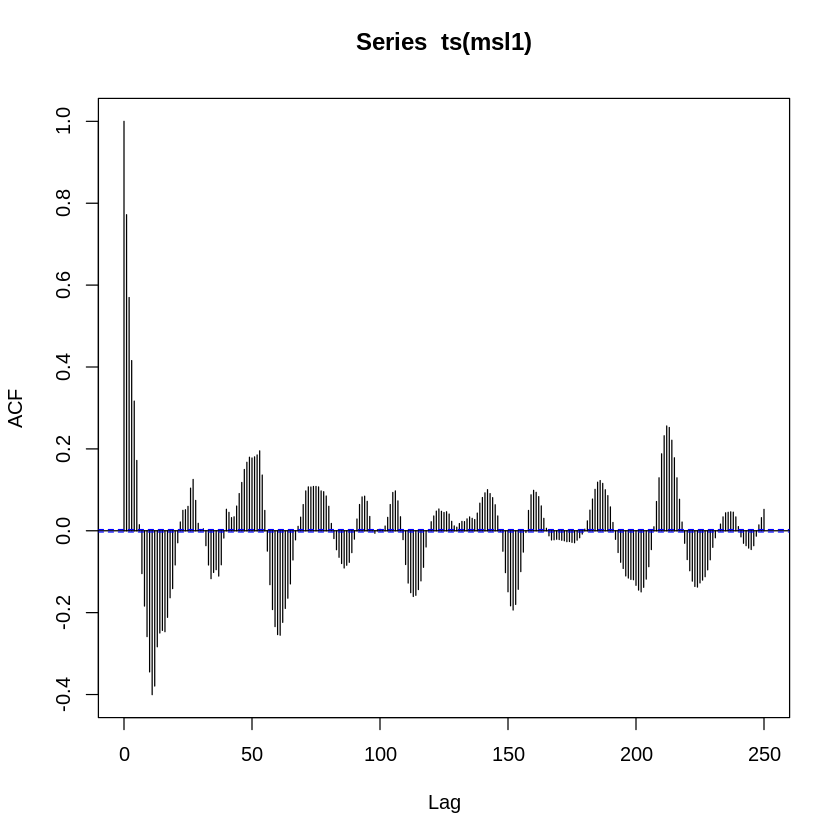

In [ ]:
msl1.acf <- acf(ts(msl1), lag.max = 250)

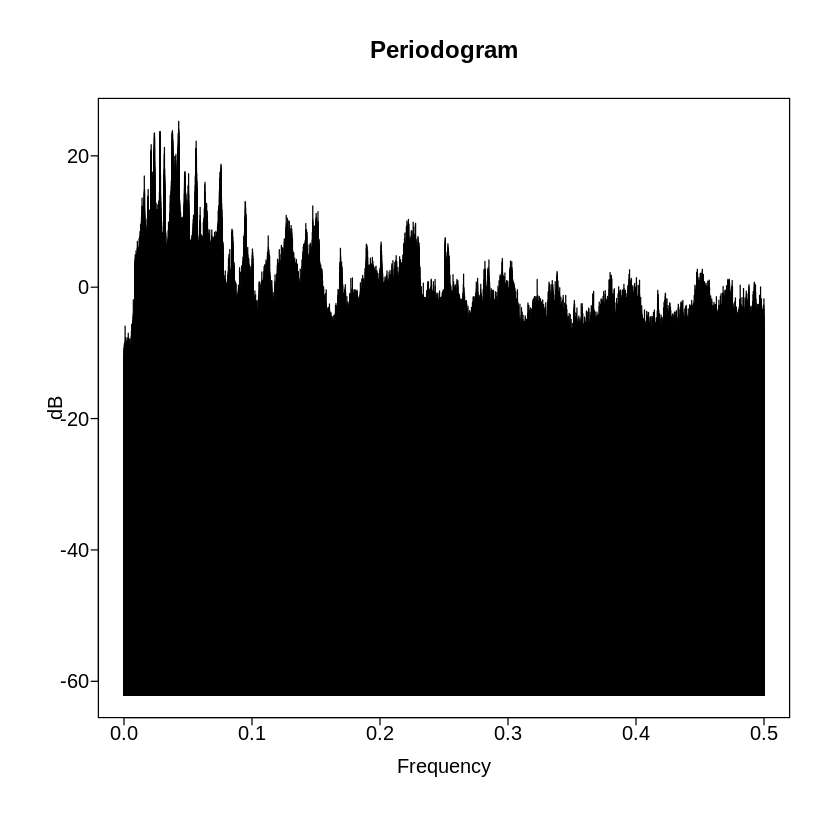

In [ ]:
msl1.period <- period.wge(msl1)

Now we can use this periodogram to find the 5 highest frequencies. For each one identified, since we can visually see that the five highest peaks run in increasing order on the periodogram, we can take a new range of all frequencies lower than the previous peak.

In [ ]:
which.max(msl1.period$pgram)
print(4410*msl1.period$freq[18281])

# note: The peak at 188 Hz contains a few maximums,
# so this range is taken a bit lower for the next maximum
which.max(msl1.period$pgram[1:18240]) 
print(4410*msl1.period$freq[16188])

which.max(msl1.period$pgram[1:16150])
print(4410*msl1.period$freq[12046])

which.max(msl1.period$pgram[1:12000])
print(4410*msl1.period$freq[10176])

# note: The fifth peak appears to be at a higher frequency,
# so we will index those higher than our original
which.max(msl1.period$pgram[18400:length(msl1.period$pgram)]) 
print(4410*msl1.period$freq[18400 + 5718])

[1] 18281

[1] 188.4639


[1] 16188

[1] 166.8866


[1] 12046

[1] 124.1856


[1] 10176

[1] 104.9072


[1] 5718

[1] 248.6392


So we have our top five frequencies for the first half of the song, which (according to the MTU chart cited) in decreasing orders of magnitude are the notes $F\#_3$, $E_3$, $B_2$, $G\#_2$, and $B_3$. 

Next, let's conduct the same analysis on the second half.

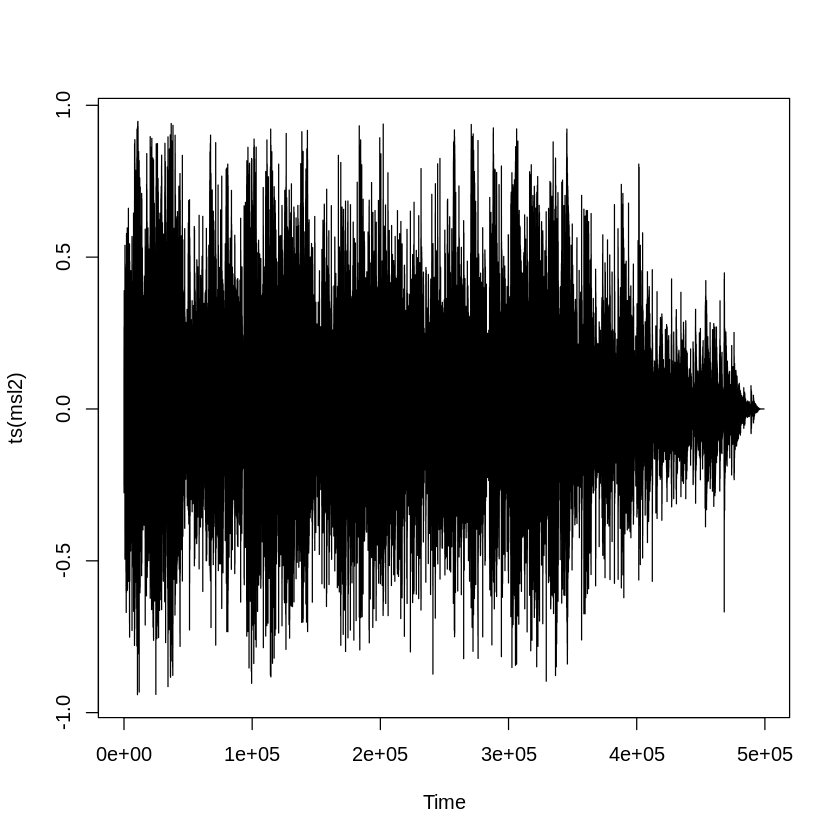

In [ ]:
msl2.plot <- plot.ts(ts(msl2))

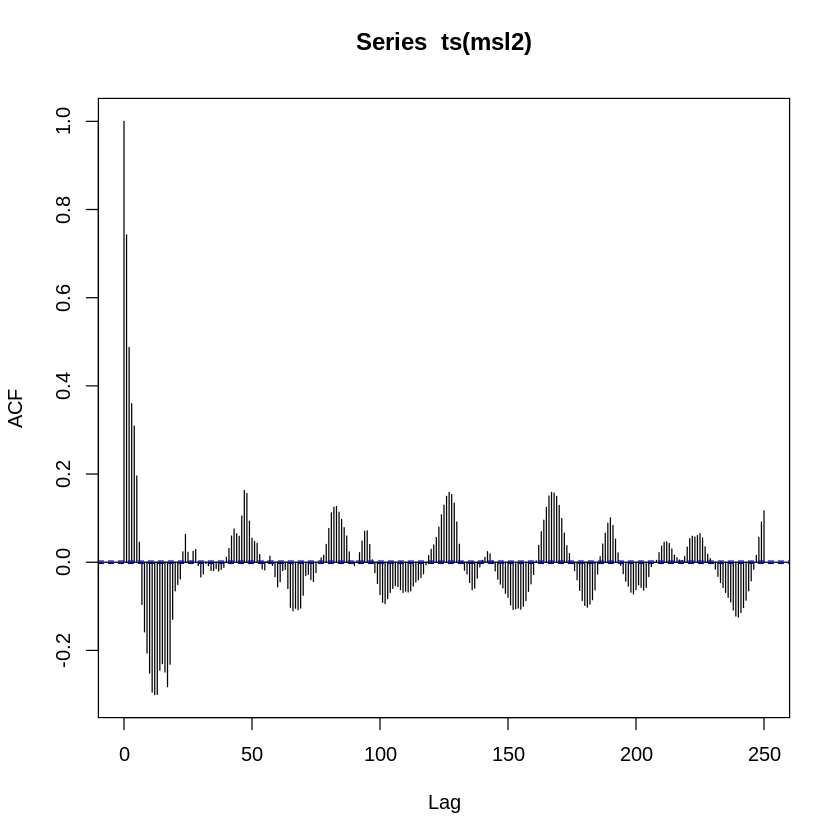

In [ ]:
msl2.acf <- acf(ts(msl2), lag.max = 250)

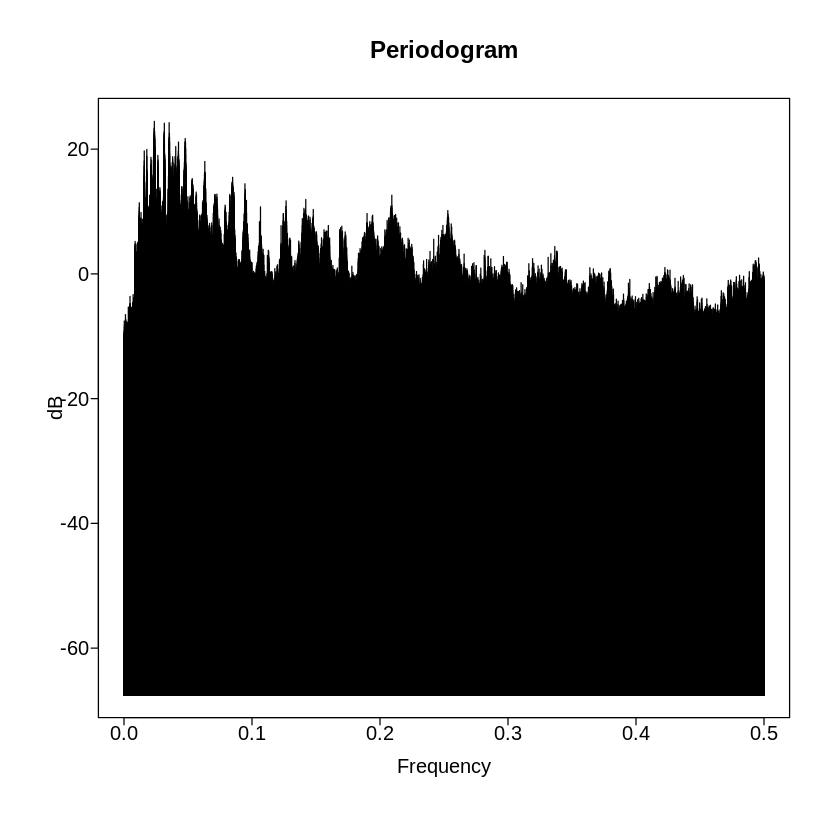

In [ ]:
msl2.period <- period.wge(msl2)

In [ ]:
which.max(msl2.period$pgram)
print(4410*msl2.period$freq[11839])

which.max(msl2.period$pgram[12000:length(msl2.period$pgram)])
print(4410*msl2.period$freq[12000 + 5614])

# Third peak is between the first two
which.max(msl2.period$pgram[11850:17600])
print(4410*msl2.period$freq[11850 + 3885])

which.max(msl2.period$pgram[17800:length(msl2.period$pgram)])
print(4410*msl2.period$freq[17800 + 6077])

# Fifth peak is between second and fourth
which.max(msl2.period$pgram[17800:23800])
print(4410*msl2.period$freq[17800 + 3460])

[1] 11839

[1] 104.5662


[1] 5614

[1] 155.573


[1] 3885

[1] 138.977


[1] 6077

[1] 210.89


[1] 3460

[1] 187.7757


To check against any mistakes in this methodology, we will test to make sure these are truly our peaks. If each has a magnitude around 20, and these peaks are in decreasing order, then they are what we were looking to identify.

In [ ]:
msl2.period$pgram[11839]
msl2.period$pgram[12000 + 5613]
msl2.period$pgram[11850 + 3884]
msl2.period$pgram[17800 + 6076]
msl2.period$pgram[17800 + 3459]

[1] 24.4561

[1] 24.23341

[1] 24.14444

[1] 21.70268

[1] 21.12312

Perfect! Our top five frequencies for the second half of the song correspond to (in decreasing order of magnitude) the notes $G\#_2$, $D\#_3$, $C\#_3$, $A_3$, and $F\#_3$.

## Results and Discussion

### Prediction of Augmented Frequencies

The following table contains the 5 most dominant frequencies of the first half of the song, what we would predict the dominant frequencies in the second half to be based on a two semitone raise in pitch (about 1.1225 times higher), and the actual dominant frequencies in the second half of the song. Each value is measured in hertz.

| 1st Half     | Prediction | 2nd Half |
| ----------- | ----------- | --------- |
| 188.5 | 211.6 | 104.6 |
| 166.9 | 187.3 | 155.6 |
| 124.2 | 139.4 | 139.0 |
| 104.9 | 117.8 | 210.1 |
| 248.6 | 279.1 | 187.8 |

<p> It appears as though we have three pitches which matched our prediction: 187.3 -> 187.8 Hz, 211.6 -> 210.1 Hz, and 139.4 -> 139.0 Hz. All of these errors are within the error for the pitch of a note, so they can be attributed to instruments being slightly out of tune. Additionally, our prediction of 279.1 is just about twice that of 139.0 Hz; this is simply the same note played down an octave. </p>
<p>Although none of these values matched the place in the order of the predicted pitches, many of the dominant frequencies were close to the same magnitude. Some notes are bound to be played louder in one section of a song compared to another. Additionally, while similar, the two sections of the song do not consist of exactly the same played content (e.g. there is a short outro which fades out at the end of the song). I am reasonably confident that we have shown the change of dominant frequencies due to the key change to be what was expected. </p>

### Discussion of Methods

Unfortunately, identifying the dominant frequencies is difficult, especially with a very large dataset such as the one being used. I would have liked to try to slice the song in different ways to further demonstrate the claim (if we have 10 random slices from the song, can we identify which came from which half?), however the runtime required to produce periodograms on this data was debilitating. I only used one in every 10 samples from the original mp3, but this still resulted in a dataset which was too large. I was stuck with a realization of this size because if the sampling rate were to be lowered any more, it would have interfered with pitch identification. Thus, I could only run each periodogram code cell once.

My method for finding dominant frequencies with the periodogram essentially consisted of taking educated guesses of data slices based on the graph. However, based on the fact that I was able to show that these magnitudes were what was expected (about 20 dB), I am confident in their correct identification.

Lastly, while the results may seem cherrypicked due to the range of frequencies I associated (for instance, equating 212 Hz with 210 Hz as being a correct prediction), this is the nature of music. People sing and play slightly out of tune, especially on a demo recording. I was afraid that the drums, which by their nature aren't going to change in pitch, would affect the results. Given all of these uncertainties, the fact that 4 of the 5 predictions were substantiated is more of a positive result than I could have expected.

## References

- Harrison, G. (1970). *My Sweet Lord - Demo*. On *Early Takes Volume 1*. UME. Retrieved from https://open.spotify.com/album/2cg5Kvqb3GBEQfU0ugcyR3?highlight=spotify:track:7aB8fP5KAblitpKafhND9z

- “Tuning - MTU.” Frequencies of Musical Notes, A4 = 440 Hz, https://pages.mtu.edu/~suits/notefreqs.html. 

- “Equal Temperament - SFU.” Equal_Temperament, www.sfu.ca/sonic-studio-webdav/handbook/Equal_Temperament.html. 
